# Dash: a powerful web platform for visualizing and interacting with data

In [1]:
import dash_core_components as dcc
import dash_html_components as html
import dash_table_experiments as dt
import dash

In [2]:
from pyarrow import feather
data = feather.read_feather(source='/Users/npg2108/Research/Projects/pediatrics/data/20180214_aeolous_stats.tsv.feather',nthreads=16,columns=['drug_concept_name','aed','age_cat'])

In [3]:
show = data.head(50).copy()

In [5]:
dt.DataTable(rows=show.to_dict('id'))

DataTable(rows={0: {'drug_concept_name': 'gadoteridol', 'aed': 'non-AED', 'age_cat': '[50,55)'}, 1: {'drug_concept_name': 'gadoteridol', 'aed': 'non-AED', 'age_cat': '[45,50)'}, 2: {'drug_concept_name': 'gadoteridol', 'aed': 'non-AED', 'age_cat': '[25,30)'}, 3: {'drug_concept_name': 'gadoteridol', 'aed': 'non-AED', 'age_cat': '[80,85)'}, 4: {'drug_concept_name': 'gadoteridol', 'aed': 'non-AED', 'age_cat': '[65,70)'}, 5: {'drug_concept_name': 'gadoteridol', 'aed': 'non-AED', 'age_cat': '[20,25)'}, 6: {'drug_concept_name': 'gadoteridol', 'aed': 'non-AED', 'age_cat': '[65,70)'}, 7: {'drug_concept_name': 'gadoteridol', 'aed': 'non-AED', 'age_cat': '[65,70)'}, 8: {'drug_concept_name': 'gadoteridol', 'aed': 'non-AED', 'age_cat': '[35,40)'}, 9: {'drug_concept_name': 'gadoteridol', 'aed': 'non-AED', 'age_cat': '[70,75)'}, 10: {'drug_concept_name': 'gadoteridol', 'aed': 'non-AED', 'age_cat': '[20,25)'}, 11: {'drug_concept_name': 'gadoteridol', 'aed': 'non-AED', 'age_cat': '[50,55)'}, 12: {'drug

In [56]:
?dash.dependencies.Input

In [2]:
dcc.

In [3]:
#html.Div?

In [27]:
from pyarrow import feather
import pandas as pd

In [37]:
ages = feather.read_feather(source='/Users/npg2108/Research/Projects/pediatrics/data/20180214_aeolous_stats.tsv.feather',nthreads=16,columns=['master_age'])

In [38]:
import matplotlib.pyplot as plt

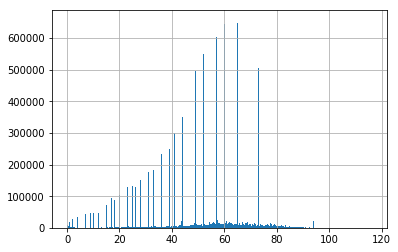

In [39]:
ages.master_age.hist(bins=1000)
plt.show()

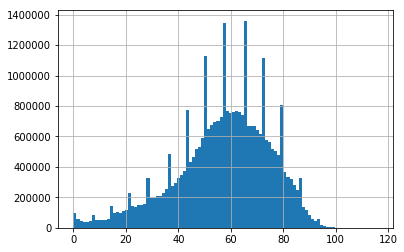

In [40]:
ages.master_age.hist(bins=100)
plt.show()

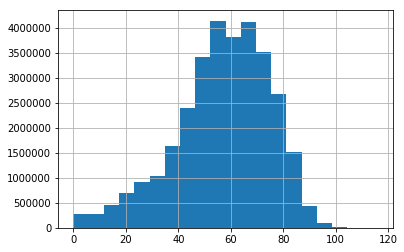

In [41]:
ages.master_age.hist(bins=20)
plt.show()

In [42]:
drugs = feather.read_feather(source='/Users/npg2108/Research/Projects/pediatrics/data/20180214_aeolous_stats.tsv.feather',nthreads=16,columns=['drug_concept_name'])

Outline for choosing a drug and plotting at what age patients are taking it

In [43]:
import ipywidgets

In [50]:
uniq_drugs = drugs.drug_concept_name.unique()

In [51]:
d = ipywidgets.Dropdown(options=uniq_drugs,value=uniq_drugs[0])
d

Dropdown(options=('gadoteridol', 'Gadopentetate.Dimeglumine', 'Cinnarizine', 'Tenecteplase', 'Levobupivacaine'…

In [54]:
data.query('drug_concept_name==@d.label').count().values[0]

3051

In [57]:
drugs_age_cat = feather.read_feather(source='/Users/npg2108/Research/Projects/pediatrics/data/20180214_aeolous_stats.tsv.feather',nthreads=16,columns=['drug_concept_name','age_cat'])

In [66]:
series = drugs_age_cat.query('drug_concept_name == @d.label').groupby(['age_cat']).apply(lambda x : x.shape[0])

In [67]:
x = series.index.tolist()
y = series.values / series.sum()